In [5]:
import evaluate
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to plot a groupd bar chart
def grouped_bar_chart(labels, title, xlabel, ylabel, *argv):
    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars
    bars = len(argv)

    fig, ax = plt.subplots()
    for i in range(len(argv)):
        arg = argv[i]
        ax.bar(x + (2 * i + 1 - bars) * width / 2, arg[1], width, label=arg[0])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(bottom=0, top=8)
    ax.legend()

    plt.show()

In [3]:
# Function to show simulation errors in a grouped bar chart
def plot_task_error(size):
    labels = ["read1", "write1", "read2", "write2", "read3", "write3"]

    # atop_file =     "log/cluster/100gb/atop_mem.log"
    real_time_log = "real/%dgb/timestamps_pipeline.csv" % size
    sim_py_log = "pysim/%dgb_sim_time.csv" % size
    simgrid_log = "simgrid_org/timestamp_sim_exp1_%dgb.csv" % size

    py_error = evaluate.task_time_error(real_time_log, sim_py_log)
    simgrid_error = evaluate.task_time_error(real_time_log, simgrid_log)

    grouped_bar_chart(labels, "Simulation error of tasks with %dGB" % size, "tasks", "error",
                      ("Python", py_error), ("Original SimGrid", simgrid_error))

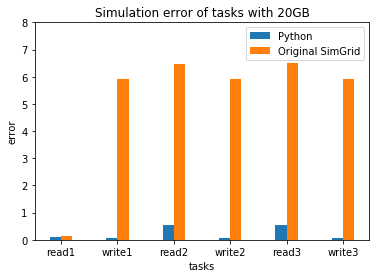

In [8]:
%matplotlib inline
# Sizes of the input files
sizes = [20, 50, 75, 100]
for size in sizes:
    plot_task_error(size)